In [1]:
import os

In [2]:
os.chdir('../')

In [3]:
%pwd

'/home/utpal108/dev/Python/Test/Image-Segmentation-Using-YOLOv8-and-SAM'

In [4]:
from ultralytics import YOLO
import numpy as np
import pandas as pd
import cv2
import sys
import torch
from PIL import Image
sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor
import matplotlib.pyplot as plt
import os


In [5]:
yolo_model = YOLO('artifacts/model/best.pt')

In [6]:
image = cv2.imread('artifacts/prediction/inputImage.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = yolo_model.predict(source=image)


0: 640x640 2 PLATELETs, 85 RBCs, 2 WBCs, 1000.5ms
Speed: 2.1ms preprocess, 1000.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


In [7]:
yolo_model.names

{0: 'PLATELET', 1: 'RBC', 2: 'WBC', 3: 'blood-cell'}

In [8]:
boxes_class = np.array([])
boxes_class_name = np.array([])
for result in results:
    for c in result.boxes.cls:
        boxes_class = np.append(boxes_class,int(c))
        boxes_class_name = np.append(boxes_class_name,yolo_model.names[int(c)])

In [9]:
boxes_class_name

array(['RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC',
       'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'WBC', 'RBC', 'RBC', 'RBC', 'RBC', 'WBC', 'RBC', 'PLATELET', 'RBC', 'PLATELET',
       'RBC', 'RBC'], dtype='<U32')

In [10]:
boxes_class

array([          1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,
                 1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,
                 1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,
                 1,           1,           

In [11]:
number_of_classes = len(yolo_model.names)
boxes_class_color = [np.concatenate([np.random.random(3), np.array([0.7])], axis=0) for x in range(number_of_classes)]
boxes_class_color

[array([   0.051251,      0.9152,     0.80152,         0.7]),
 array([    0.34854,     0.80617,     0.53323,         0.7]),
 array([    0.69654,     0.32758,      0.5579,         0.7]),
 array([    0.65428,    0.079637,     0.80696,         0.7])]

In [12]:
boxes = result.boxes.xyxy
boxes

tensor([[2.0629e+02, 6.0083e+01, 2.4540e+02, 1.1022e+02],
        [2.3452e+02, 2.9454e+02, 2.7606e+02, 3.5188e+02],
        [9.3538e+01, 3.4722e+02, 1.3134e+02, 3.9592e+02],
        [6.6591e+01, 4.3782e+02, 1.0839e+02, 4.9581e+02],
        [4.4665e+02, 5.5609e+02, 4.8449e+02, 6.0527e+02],
        [1.6727e+02, 1.1150e+02, 2.0419e+02, 1.6157e+02],
        [5.1713e+02, 4.6121e+02, 5.5649e+02, 5.1612e+02],
        [1.2029e+02, 1.5657e+02, 1.5796e+02, 2.0829e+02],
        [3.4531e+02, 5.2287e+02, 3.8298e+02, 5.7923e+02],
        [1.4266e+02, 3.6433e+02, 1.8031e+02, 4.1029e+02],
        [2.2639e+02, 1.8201e+02, 2.6487e+02, 2.3636e+02],
        [1.1631e+02, 4.5534e+02, 1.5664e+02, 5.0333e+02],
        [1.8723e+02, 1.6139e+02, 2.2329e+02, 2.0766e+02],
        [4.6065e+02, 1.1193e+02, 4.9899e+02, 1.6329e+02],
        [3.3921e-01, 4.4167e+02, 2.8579e+01, 4.8871e+02],
        [3.7166e+02, 1.3586e+01, 4.0931e+02, 6.1465e+01],
        [1.5576e+02, 4.9144e+02, 1.9589e+02, 5.4433e+02],
        [4.697

In [13]:
df = pd.DataFrame({'class':boxes_class_name, 'bbox':boxes.tolist()})
df.to_csv('artifacts/prediction/prediction.csv', index=False)

## SAM

In [14]:

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"
CHECKPOINT_PATH = "sam_vit_h_4b8939.pth"

In [15]:
sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)
predictor = SamPredictor(sam)
predictor.set_image(image)

In [16]:
transformed_boxes = predictor.transform.apply_boxes_torch(boxes, image.shape[:2])
masks, _, _ = predictor.predict_torch(
    point_coords=None,
    point_labels=None,
    boxes=transformed_boxes,
    multimask_output=False,
)

In [17]:
masks.shape 

torch.Size([89, 1, 640, 640])

In [18]:
def show_mask(mask, ax, color):
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2)) 

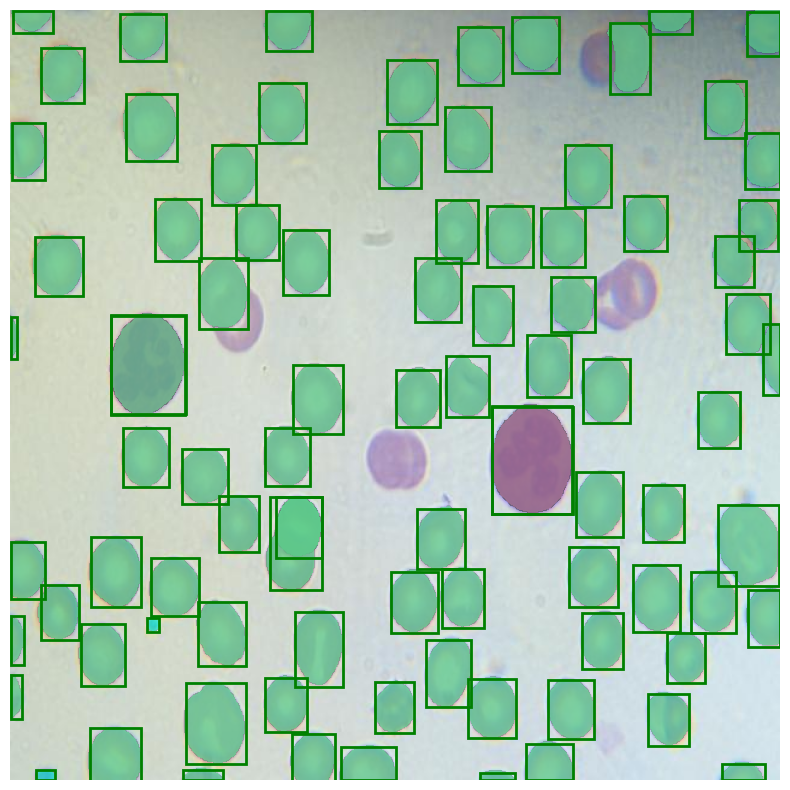

In [19]:
plt.figure(figsize=(10, 10))
plt.imshow(image)

# for mask in masks:
for i, mask in enumerate(masks):
    show_mask(mask.cpu().numpy(), plt.gca(), color=boxes_class_color[int(boxes_class[i])])
for box in boxes:
    show_box(box.cpu().numpy(), plt.gca())
plt.axis('off')
plt.savefig('artifacts/prediction/outputImage.jpg')
plt.show()